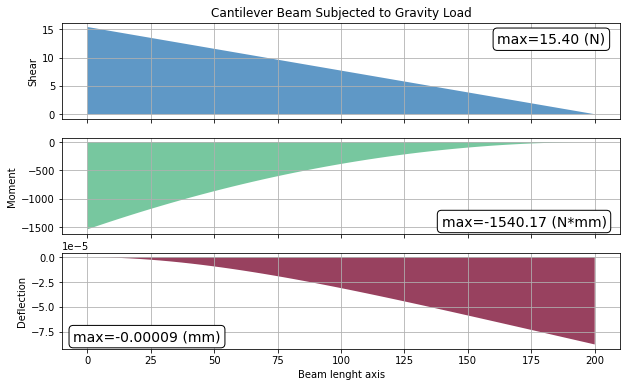

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Beam parameters
l=200		     #mm, lenght
h=100                #mm, height
b=10  		     #mm, width
a=0                  #mm, point where load begins
g=9810               #mm/s^2
rho=7.850*(10**-9)   #g/mm^3
E = 210*(10**3)      #N/mm^2
I = (b*h**3)/12      #Second moment of area for square cross section
w=rho*g*b*h          #UDL by beam own weight (N/mm)

#Reactions 
r1=w*(l-a)           #Reaction at the support
m1=(w/2)*(l**2-a**2) #Moment on the support

#Shear, Bending and deflection arrays
x=np.linspace(0,l)
V=r1*(x>=0)*(x-0)**0-w*(x>=a)*(x-a)**1
M=-m1*(x>=0)*(x-0)**0+r1*(x>=0)*(x-0)**1-(w/2)*(x>=a)*(x-a)**2
y=(1/float (E*I))*(-(m1/2)*x**2+(r1/6)*x**3-(w/24)*(x>=a)*x**4)

#Max Values
maxV=max(V)
maxM=min(M)
maxy=min(y)

#Diagrams plot
textstr1 = 'max=%.2f (N)'%(maxV)
textstr2 = 'max=%.2f (N*mm)'%(maxM)
textstr3 = 'max=%.5f (mm)'%(maxy)
props = dict(boxstyle='round', facecolor='white')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))
ax1.fill_between(x, 0, V, facecolor='#377EB8', alpha=0.8)
ax1.set_ylabel('Shear')
ax1.text(0.78, 0.9, textstr1, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax1.set_title('Cantilever Beam Subjected to Gravity Load')
ax1.grid (True)
ax2.fill_between(x, 0, M, facecolor='#55BA87', alpha=0.8)
ax2.set_ylabel('Moment')
ax2.text(0.68, 0.2, textstr2, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax2.grid (True)
ax3.fill_between(x, 0, y, facecolor='#7E1137', alpha=0.8)
ax3.set_ylabel('Deflection')
ax3.set_xlabel('Beam lenght axis')
ax3.text(0.02, 0.2, textstr3, transform=ax3.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax3.grid (True)

#plt.show()
plt.savefig('beam.svg', format='svg', dpi=1200)